<a id="top"></a>

# Data Cleaning and EDA

---

This post is where the data cleaning and basic EDA takes place. The data scraped from reddit is already fairly clean and, lacking much numerical data, EDA and visualizations are quite brief as well. Taking note from last project, the training and testing data is concatenated into one dataframe and cleaned all at once to facilitate the process and increase readability. The dataframes are split apart in the Models notebook. 

[comment]: <> (MARKDOWN COMMENT AAAAAAAAAAAAAAAAA)


#### This Notebook
- [Cleaning](#clean)
- [Visualizations](#viz)

#### Other Notebooks
- [Data Gathering](gathering.ipynb)
- [Models](models.ipynb)

### Importing
---

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [93]:
# training set
raw_dnd = pd.read_csv("../data/dnd_raw.csv")
raw_path = pd.read_csv("../data/path_raw.csv")

# testing set
raw_dnd_test = pd.read_csv("../data/dnd_test_raw.csv")
raw_path_test = pd.read_csv("../data/path_test_raw.csv")

# alternate set
raw_dnd_alt = pd.read_csv("../data/dnd_alt_raw.csv")
raw_path_alt = pd.read_csv("../data/path_alt_raw.csv")

In [94]:
raw_dnd.head(2)

,approved_at_utc,approved_by,archived,author,author_cakeday,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,...,thumbnail_height,thumbnail_width,title,ups,url,user_reports,view_count,visited,whitelist_status,wls
0,NaN,NaN,False,AutoModerator,NaN,NaN,NaN,[],NaN,NaN,...,NaN,NaN,Weekly Question Thread: Ask questions here Mar...,17,https://www.reddit.com/r/dndnext/comments/b5bv...,[],NaN,False,all_ads,6
1,NaN,NaN,False,AutoModerator,NaN,NaN,NaN,[],NaN,NaN,...,NaN,NaN,"Snapshots: post pics! March 30, 2019",6,https://www.reddit.com/r/dndnext/comments/b7cb...,[],NaN,False,all_ads,6


In [95]:
raw_path.head(2)

,approved_at_utc,approved_by,archived,author,author_cakeday,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,author_flair_text,...,thumbnail_height,thumbnail_width,title,ups,url,user_reports,view_count,visited,whitelist_status,wls
0,NaN,NaN,False,AutoModerator,NaN,NaN,NaN,[],NaN,LN internet golem,...,NaN,NaN,"Quick Questions - March 27, 2019",7,https://www.reddit.com/r/Pathfinder_RPG/commen...,[],NaN,False,all_ads,6
1,NaN,NaN,False,AutoModerator,NaN,NaN,NaN,[],NaN,LN internet golem,...,NaN,NaN,"Post Your Build - March 31, 2019",11,https://www.reddit.com/r/Pathfinder_RPG/commen...,[],NaN,False,all_ads,6


In [96]:
raw_dnd.columns

Index(['approved_at_utc', 'approved_by', 'archived', 'author',
       'author_cakeday', 'author_flair_background_color',
       'author_flair_css_class', 'author_flair_richtext',
       'author_flair_template_id', 'author_flair_text',
       'author_flair_text_color', 'author_flair_type', 'author_fullname',
       'author_patreon_flair', 'banned_at_utc', 'banned_by', 'can_gild',
       'can_mod_post', 'category', 'clicked', 'content_categories',
       'contest_mode', 'created', 'created_utc', 'crosspost_parent',
       'crosspost_parent_list', 'distinguished', 'domain', 'downs', 'edited',
       'gilded', 'gildings', 'hidden', 'hide_score', 'id', 'is_crosspostable',
       'is_meta', 'is_original_content', 'is_reddit_media_domain',
       'is_robot_indexable', 'is_self', 'is_video', 'likes',
       'link_flair_background_color', 'link_flair_css_class',
       'link_flair_richtext', 'link_flair_template_id', 'link_flair_text',
       'link_flair_text_color', 'link_flair_type', 'locked'

<a id = "clean"></a>

### Cleaning
---

As the raw data scraped from reddit is already mostly clean, the cleaning process here mostly involves dropping the irrelevant columns and making boolean columns out of the ones that contain categorical data.

[Back to top](#top)

In [97]:
# Isolating the potentially useful columns and dropping the rest.

useful  = ["domain", "media", "num_comments", "score", "selftext", "subreddit", "title"]

df_dnd = raw_dnd[useful]
df_path = raw_path[useful]

df_dnd_test = raw_dnd_test[useful]
df_path_test = raw_path_test[useful]

df_dnd_alt = raw_dnd_alt[useful]
df_path_alt = raw_path_alt[useful]

In [98]:
# Differentiating the test set from the training set
# so they don't get jumbled up in the next step.

df_dnd_test.loc[df_dnd_test.index, "subreddit"] = "dndnext_test"
df_path_test.loc[df_path_test.index, "subreddit"] = "pathfinder_test"

In [99]:
# Putting all the data frames into one big dataframe 
# so they can all be cleaned at once. 

final = pd.concat([df_dnd, df_path, df_dnd_test, df_path_test])
final = final.reset_index(drop = True)

In [100]:
final.shape

(2985, 7)

In [101]:
final.isna().sum()

domain             0
media           2940
num_comments       0
score              0
selftext         216
subreddit          0
title              0
dtype: int64

In [102]:
# Convert "domain" and "media" into the boolean 
# columns "has_unique_domain" and "has_media"

final["media"] = [int(i) for i in ~final["media"].isna()]

non_reddit_domain = []
for i in range(len(final)):
    if "self." in list(final["domain"])[i]:
        non_reddit_domain.append(0)
    else:
        non_reddit_domain.append(1)

final["domain"] = non_reddit_domain

final = final.rename(columns = {"domain": "has_unique_domain", "media": "has_media"})

In [103]:
# Replace posts with no body with their title instead

final.loc[final["selftext"].isna(), "selftext"] = final.loc[final["selftext"].isna(), "title"]

In [104]:
final.isna().sum()

has_unique_domain    0
has_media            0
num_comments         0
score                0
selftext             0
subreddit            0
title                0
dtype: int64

In [105]:
# Keeping the alternate dataframe separate. Cleaning process is the same, 
# except for creating the boolean columns as they were left unused anyways.

df_alt = pd.concat([df_dnd_alt, df_path_alt]).reset_index(drop = True)
df_alt.loc[df_alt["selftext"].isna(), "selftext"] = df_alt.loc[df_alt["selftext"].isna(), "title"]
df_alt["subreddit"] = df_alt["subreddit"].map({"DnDBehindTheScreen": 1, "Pathfinder": 0})

<a id = "viz"></a>

### Visualizations

---

Keeping it brief here because it's hard to visualize correlations in text, and there aren't as many features to go off of in the first place.

[Back to top](#top)

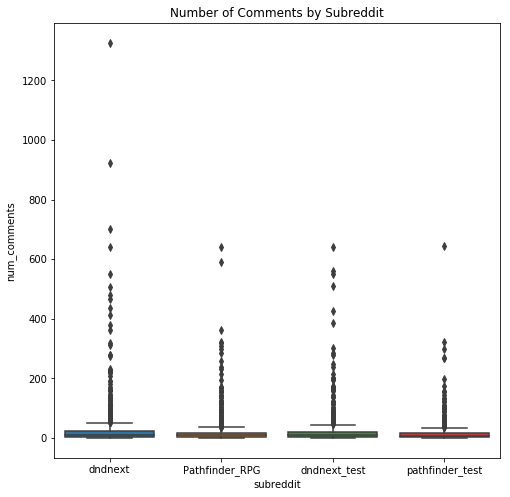

In [106]:
plt.figure(figsize = (8,8))

sns.boxplot(final["subreddit"], final["num_comments"])

plt.title("Number of Comments by Subreddit");

> Distribution of the number of comments is very highly skewed

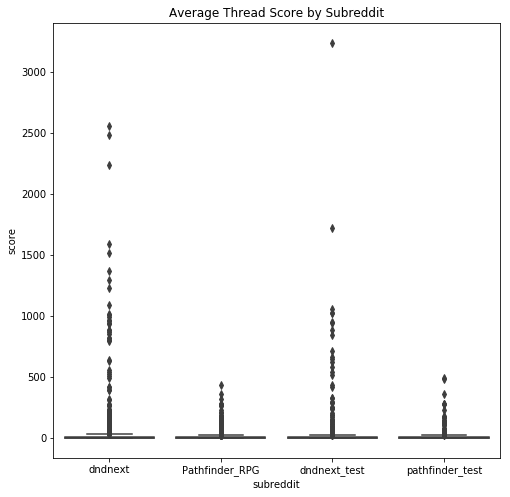

In [107]:
plt.figure(figsize = (8,8))

sns.boxplot(final["subreddit"], final["score"])

plt.title("Average Thread Score by Subreddit");

> Score appears to be highly skewed as well

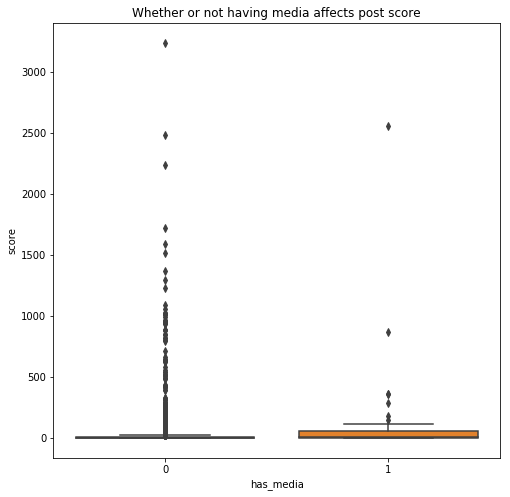

In [108]:
plt.figure(figsize = (8,8))

sns.boxplot(final["has_media"], final["score"])

plt.title("Whether or not having media affects post score");

> The presence of media and score does not appear to be strongly correlated either.

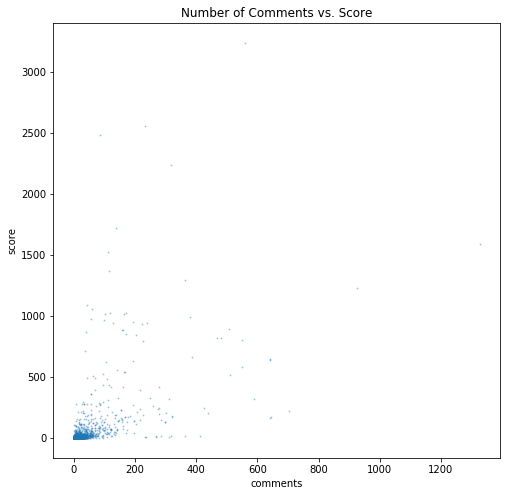

In [109]:
plt.figure(figsize = (8,8))

plt.scatter(final["num_comments"], final["score"], 
            s = 1,
            alpha = 0.3
           )

plt.xlabel("comments")
plt.ylabel("score")

plt.title("Number of Comments vs. Score");

> Score and comments also vary widely, although most posts have few of either.

### Exporting
---

In [110]:
final.to_csv("../data/final.csv", index = False)
df_alt.to_csv("../data/alt.csv", index = False)

---
[Back to top](#top)